# Datasets

c:\Users\pierr\anaconda3\envs\research\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


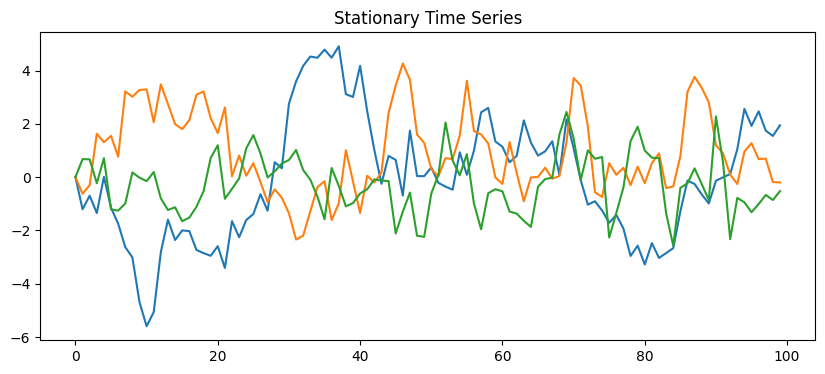

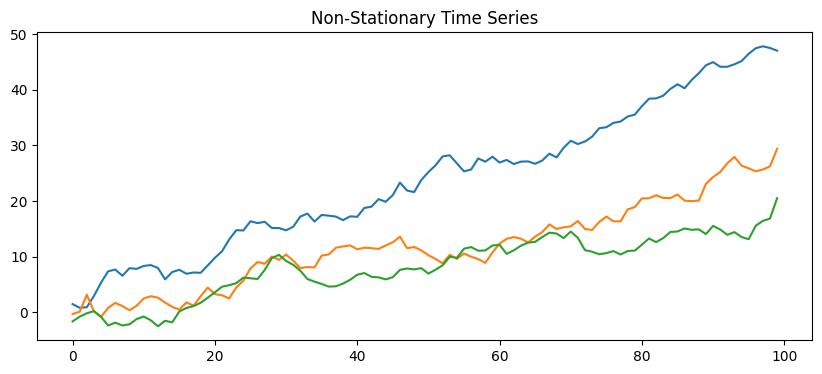

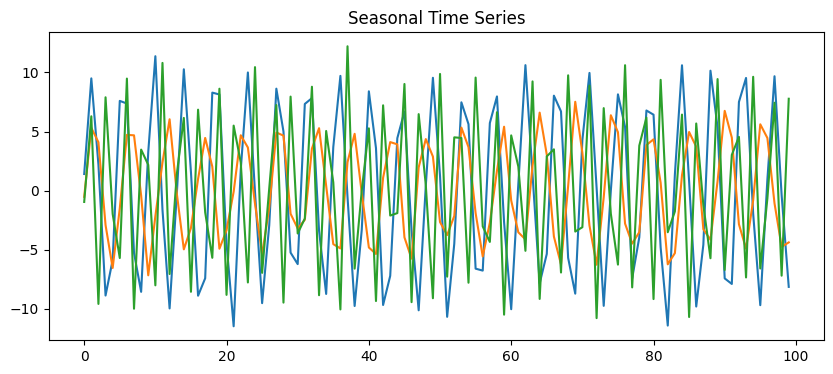

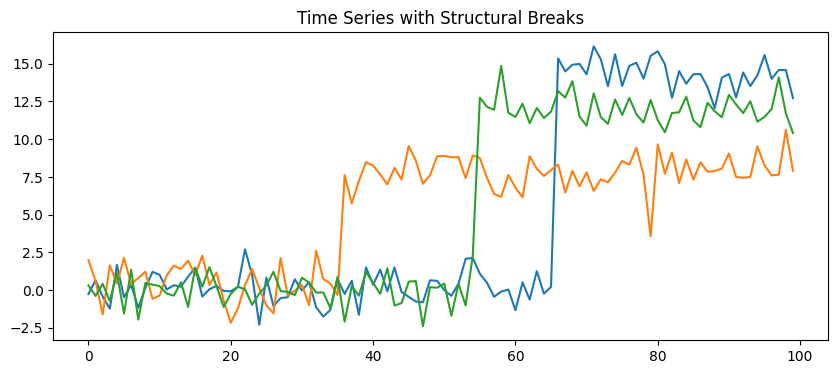

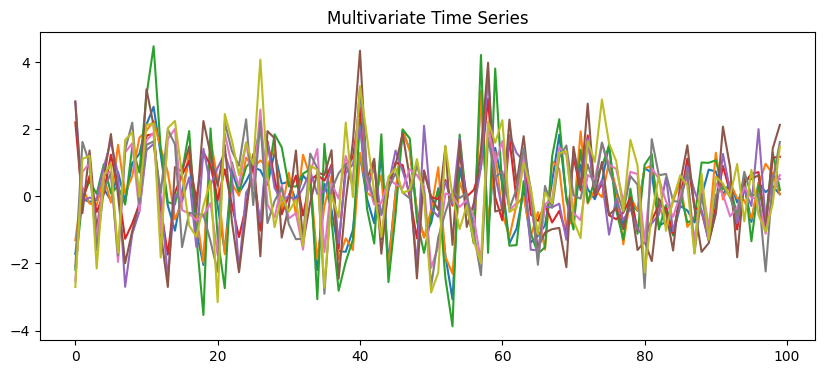

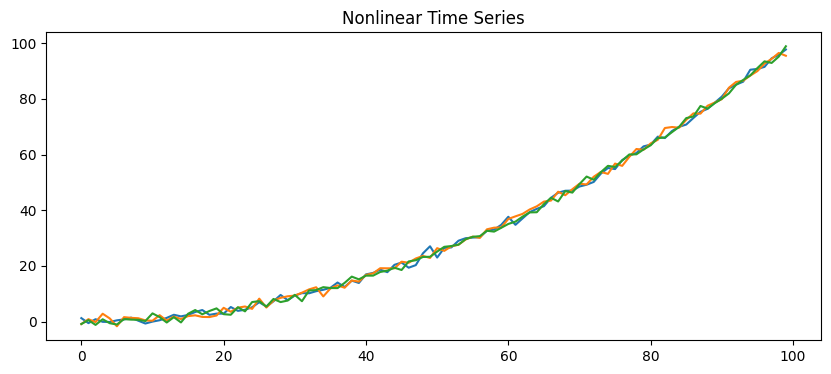

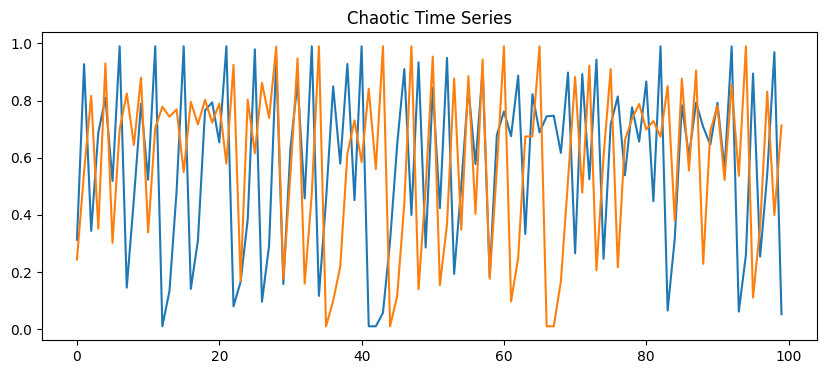

In [1]:
import numpy as np
import tsgm
from tensorflow import keras
import matplotlib.pyplot as plt

# Define parameters
seq_len = 100
feature_dim = 1
latent_dim = 10
N_EPOCHS = 1000

# Helper function to plot datasets
def plot_dataset(dataset, title):
    plt.figure(figsize=(10, 4))
    for i in range(min(len(dataset), 3)):  # Plot the first 3 series
        plt.plot(dataset[i])
    plt.title(title)
    plt.show()

# 1. Stationary Time Series (AR(1) Processes)
stationary_datasets = []
for i in range(5):
    ar_coeff = np.random.uniform(0.5, 0.9)
    noise = np.random.normal(0, 1, seq_len)
    series = np.zeros(seq_len)
    for t in range(1, seq_len):
        series[t] = ar_coeff * series[t-1] + noise[t]
    stationary_datasets.append(series.reshape(-1, 1))

plot_dataset(stationary_datasets, "Stationary Time Series")

# 2. Non-Stationary Time Series (Random Walks and Trends)
non_stationary_datasets = []
for i in range(5):
    steps = np.random.normal(0, 1, seq_len)
    trend = np.random.uniform(0.1, 0.5)
    series = np.cumsum(steps) + trend * np.arange(seq_len)
    non_stationary_datasets.append(series.reshape(-1, 1))

plot_dataset(non_stationary_datasets, "Non-Stationary Time Series")

# 3. Seasonal Time Series (Sine Waves with Noise)
seasonal_datasets = []
for i in range(5):
    freq = np.random.uniform(0.1, 0.5)
    amplitude = np.random.uniform(5, 10)
    noise = np.random.normal(0, 1, seq_len)
    series = amplitude * np.sin(2 * np.pi * freq * np.arange(seq_len)) + noise
    seasonal_datasets.append(series.reshape(-1, 1))

plot_dataset(seasonal_datasets, "Seasonal Time Series")

# 4. Time Series with Structural Breaks
structural_break_datasets = []
for i in range(5):
    breakpoint = np.random.randint(seq_len // 4, 3 * seq_len // 4)
    series = np.random.normal(0, 1, seq_len)
    series[breakpoint:] += np.random.uniform(5, 15)
    structural_break_datasets.append(series.reshape(-1, 1))

plot_dataset(structural_break_datasets, "Time Series with Structural Breaks")

# 5. Multivariate Time Series
multivariate_datasets = []
for i in range(3):
    base_series = np.random.normal(0, 1, seq_len)
    related_series_1 = base_series + np.random.normal(0, 0.5, seq_len)
    related_series_2 = base_series * np.random.uniform(0.5, 1.5) + np.random.normal(0, 0.5, seq_len)
    dataset = np.stack([base_series, related_series_1, related_series_2], axis=1)
    multivariate_datasets.append(dataset)

plot_dataset(multivariate_datasets, "Multivariate Time Series")

# 6. Nonlinear Time Series
nonlinear_datasets = []
for i in range(3):
    series = 0.01 * np.square(np.arange(seq_len)) + np.random.normal(0, 1, seq_len)
    nonlinear_datasets.append(series.reshape(-1, 1))

plot_dataset(nonlinear_datasets, "Nonlinear Time Series")

# 7. Chaotic Time Series
chaotic_datasets = []
for i in range(2):
    series = np.zeros(seq_len)
    series[0] = np.random.uniform(0.1, 0.9)
    for t in range(1, seq_len):
        series[t] = 3.8 * series[t-1] * (1 - series[t-1]) + np.random.normal(0, 0.1)
        # Clamp the value to avoid overflow
        series[t] = np.clip(series[t], 0.01, 0.99)
    chaotic_datasets.append(series.reshape(-1, 1))

plot_dataset(chaotic_datasets, "Chaotic Time Series")


# Now we have 28 datasets ready for further processing

<p>We’ll start with a basic state-space model and then move to more complex models like DPMM and IBP. Below is a roadmap for the implementation process.</p>

<h2>1. Basic State Space Model (SSM) Implementation</h2>
<h3>Objective:</h3>
<p>To model the generated time series data using a basic state-space model (e.g., Kalman Filter) and understand the dynamics of hidden states.</p>

<h3>Application:</h3>
<p><strong>Stationary Datasets:</strong> Start with these to implement a simple linear SSM since they’re relatively easy to model.</p>

<h3>Steps:</h3>
<ul>
    <li><strong>Define the state transition model.</strong></li>
    <li><strong>Define the observation model.</strong></li>
    <li><strong>Apply the Kalman Filter to estimate the hidden states.</strong></li>
</ul>


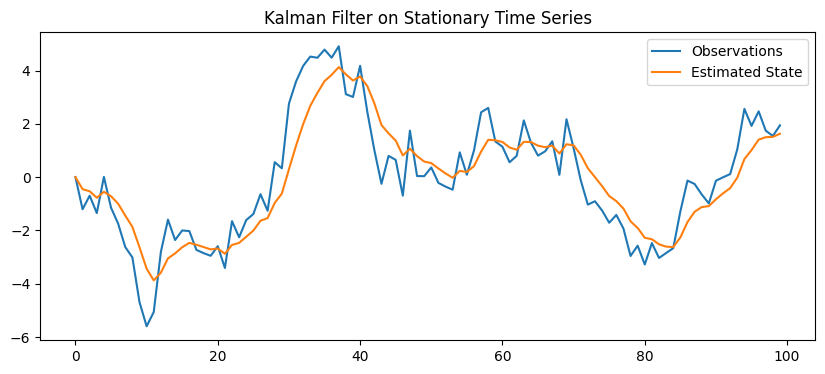

In [6]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Assuming stationary_datasets is already created as per your previous code
dataset = stationary_datasets[0].reshape(-1)  # Use the first stationary dataset

# Define the state space model parameters
transition_matrix = np.array([[1]])  # Assuming a simple model where h_t = h_(t-1) + noise
observation_matrix = np.array([[1]])  # Assuming observations are directly from the state

# Covariances
transition_covariance = np.array([[0.1]])  # Process noise covariance
observation_covariance = np.array([[1]])  # Observation noise covariance

# Initial state
initial_state_mean = np.array([0])
initial_state_covariance = np.array([[1]])

# Kalman Filter
kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    transition_covariance=transition_covariance,
    observation_covariance=observation_covariance,
    initial_state_mean=initial_state_mean,
    initial_state_covariance=initial_state_covariance
)

# Apply the Kalman Filter
state_means, state_covariances = kf.filter(dataset)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(dataset, label='Observations')
plt.plot(state_means, label='Estimated State')
plt.title('Kalman Filter on Stationary Time Series')
plt.legend()
plt.show()


c:\Users\pierr\anaconda3\envs\research\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

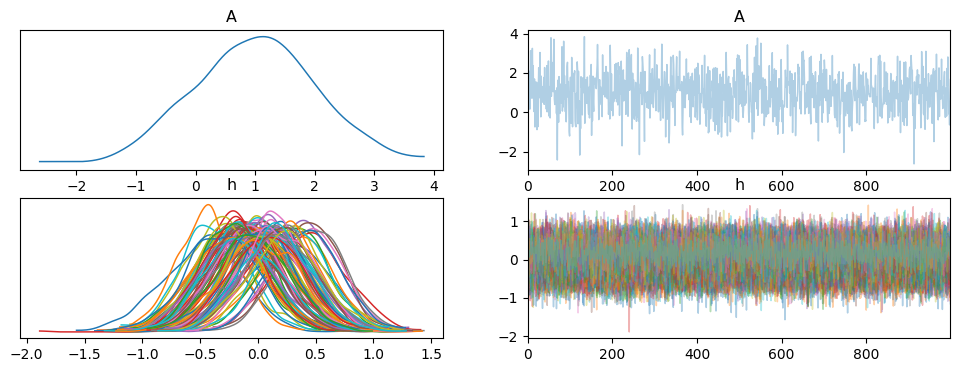

Learned A: 0.9964762547248633


In [10]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

# Assuming stationary_datasets is already created as per your previous code
dataset = stationary_datasets[0].reshape(-1)  # Use the first stationary dataset

# Fixed parameters
Q_fixed = 0.1  # Process noise covariance
R_fixed = 1.0  # Observation noise covariance
h0_fixed = 0.0  # Initial state mean

# Define the probabilistic model in PyMC
with pm.Model() as model:
    # Prior on the state transition matrix A
    A = pm.Normal("A", mu=1.0, sigma=1.0)  # Prior for A, with mean 1 and standard deviation 1

    # Define the state space model
    h = pm.Normal("h", mu=A * h0_fixed, sigma=np.sqrt(Q_fixed), shape=len(dataset))

    # Observation model (fixed R)
    y_obs = pm.Normal("y_obs", mu=h, sigma=np.sqrt(R_fixed), observed=dataset)

    # Perform Stochastic Variational Inference (SVI)
    approx = pm.fit(method="advi", n=10000, obj_optimizer=pm.adam(learning_rate=1e-2))

    # Sample from the variational posterior
    trace = approx.sample(1000)

# Visualize the results
pm.plot_trace(trace)
plt.show()

learned_A = trace.posterior["A"].mean().item()
print(f"Learned A: {learned_A}")


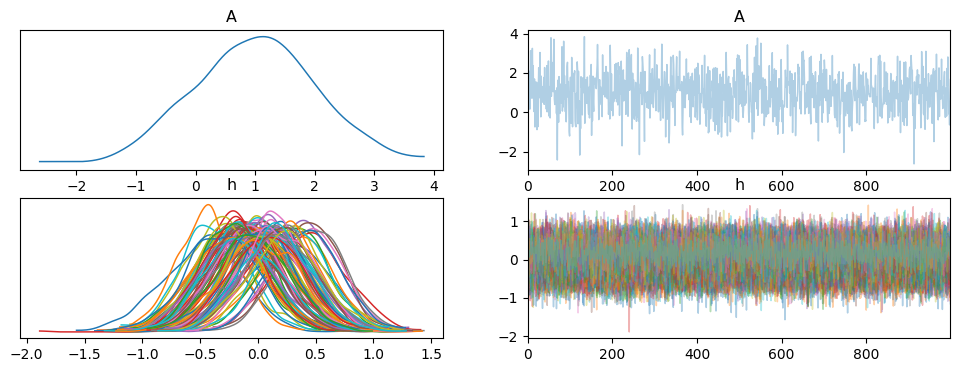

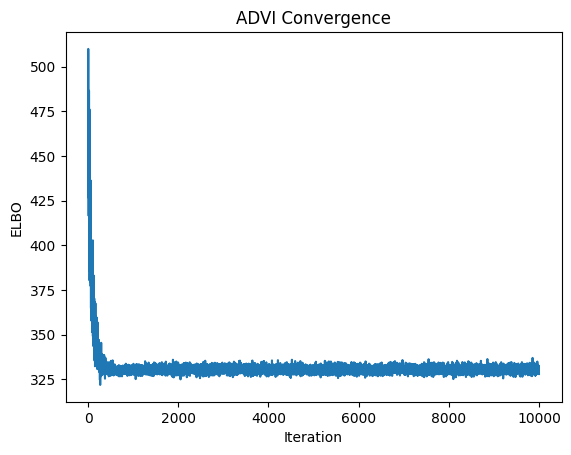

In [11]:
# Visualize the results
pm.plot_trace(trace)
plt.show()

# Plot the convergence of ADVI (optional)
plt.plot(approx.hist)
plt.title("ADVI Convergence")
plt.xlabel("Iteration")
plt.ylabel("ELBO")
plt.show()

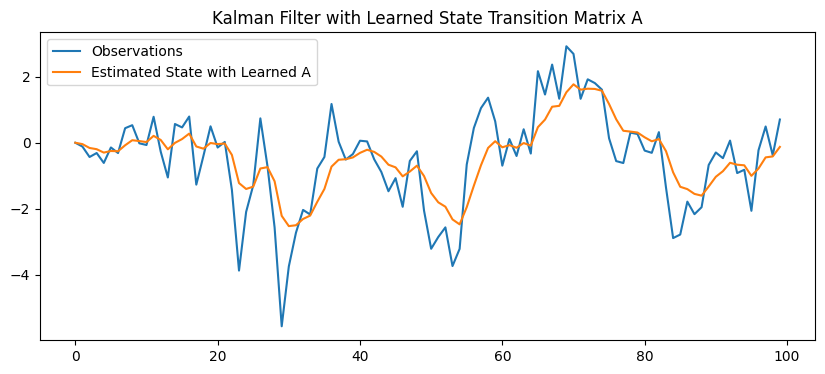

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Assuming stationary_datasets is already created as per your previous code
dataset = stationary_datasets[0].reshape(-1)  # Use the first stationary dataset

# Define initial guesses for the parameters
A_initial = np.array([[3]])  # Initial guess for the state transition matrix
C_initial = np.array([[1]])  # Initial guess for the observation matrix
Q_initial = np.array([[0.1]])  # Initial guess for the process noise covariance
R_initial = np.array([[1]])  # Initial guess for the observation noise covariance

# Initialize the Kalman Filter with these initial guesses
kf = KalmanFilter(
    transition_matrices=A_initial,
    observation_matrices=C_initial,
    transition_covariance=Q_initial,
    observation_covariance=R_initial,
    initial_state_mean=np.array([0]),
    initial_state_covariance=np.array([[1]])
)

# EM Algorithm - Iteratively Estimate Parameters
n_iter = 10  # Number of iterations for EM algorithm
for i in range(n_iter):
    # E-step: Apply the Kalman Filter to get the state estimates
    state_means, state_covariances = kf.filter(dataset)
    
    # M-step: Update the parameters based on the state estimates
    # Estimate A (state transition matrix) - simplified for illustration
    A_estimated = np.sum(state_means[1:] * state_means[:-1]) / np.sum(state_means[:-1] ** 2)
    kf.transition_matrices = np.array([[A_estimated]])
    
    # Optional: Update Q, R if desired (this can be more complex)
    # For simplicity, we assume Q and R remain fixed for now

# Apply the Kalman Filter with the learned parameter
state_means, state_covariances = kf.filter(dataset)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(dataset, label='Observations')
plt.plot(state_means, label='Estimated State with Learned A')
plt.title('Kalman Filter with Learned State Transition Matrix A')
plt.legend()
plt.show()
